## Using Gradient Boosting and Scaling to determine houseing prices.
### This resulted in a top third model in the Kaggle Competition (link below)
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [ ]:
# Model Write Up

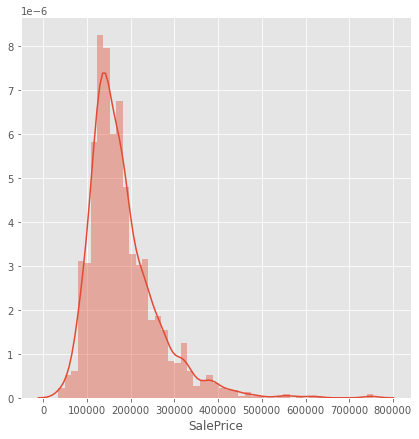

In [1]:
# Data Analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# Machine Learning Tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

# Reading in the data
df = pd.read_csv('train.csv')

# Plotting the response
plt.figure(figsize=(7,7))
sns.distplot(df['SalePrice'])

In [2]:
# Looking at the features - tons of correlation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Summary Stats of the response
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
# Labeling/Spltting into X and Y
X = df.drop(['SalePrice'], axis = 1)
y = df.SalePrice

# Bulk factorization of all features.
X = X.apply(lambda col: pd.factorize(col, sort=True)[0])

In [6]:
# Fitting with Standard Scaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, 
                                                    random_state=101)

# Using Grid Search to find the best learning rate
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate':[.01, .05, .1, .105, .11, .15, .2]}

# Fitting the Model
gbr = GradientBoostingRegressor(n_estimators=200) 
abc = GridSearchCV(gbr, parameters)
abc.fit(X_train, y_train)

In [13]:
# Predicting
predictions = abc.predict(X_test)

# Model performance
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 15852.886384060905
MSE: 648045311.2651697
RMSE: 25456.73410445986


In [14]:
# Retraining on all of the test data 
abc.fit(scaled_data, y)

GridSearchCV(estimator=GradientBoostingRegressor(n_estimators=200),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.105, 0.11, 0.15,
                                           0.2]})

In [15]:
# Reading in the test data
df_test = pd.read_csv('test.csv')

# Factorizing the test data
X_final = df_test.apply(lambda col: pd.factorize(col, sort=True)[0])

# Scaling
scaler.fit(X_final)
scaled_data_test = scaler.transform(X_final)

# Predicting on the test dataset
pred_final = abc.predict(scaled_data_test)

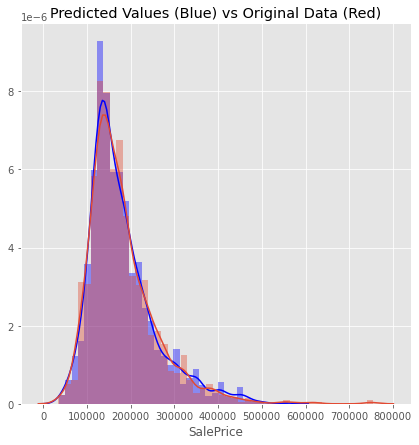

In [16]:
# Plotting the original vs predicted values to validate fit
plt.figure(figsize=(7,7))
sns.distplot(pred_final, color='blue').set_title('Predicted Values (Blue) vs Original Data (Red)')
sns.distplot(df['SalePrice'])

In [17]:
# Writting to CSV
name = ['SalePrice']

# Making the df into predictions
predictions = pd.DataFrame(pred_final, columns=name)

# Concatinating
final_frames = [df_test, predictions]
result = pd.concat(final_frames, axis=1, sort=False)

final_df = result[['Id', 'SalePrice']]

# Writting to CSV
final_df.to_csv("derek_24DEC20_v9.csv", mode = 'w', index=False)